In [5]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [16]:
from pl_bolts.datamodules import FashionMNISTDataModule, CIFAR10DataModule
import wandb
# wandb.init(project='test')

dm = FashionMNISTDataModule('.', batch_size=1, val_split=1/1000)
dm.prepare_data()
dm.setup()
for i, (a, b) in enumerate(dm.train_dataloader()):
    print(a.shape, b.shape)
    print(a.dtype, b.dtype) 
    print(a.min(), a.max())
    print(b.min(), b.max())
    # wandb.log({f'a_{i}': wandb.Image(a[i]) for i in range(10)})
    if i > 2:
        break
print(len(dm.train_dataloader()))
# wandb.finish()

torch.Size([1, 1, 28, 28]) torch.Size([1])
torch.float32 torch.int64
tensor(0.) tensor(1.)
tensor(9) tensor(9)
torch.Size([1, 1, 28, 28]) torch.Size([1])
torch.float32 torch.int64
tensor(0.) tensor(1.)
tensor(7) tensor(7)
torch.Size([1, 1, 28, 28]) torch.Size([1])
torch.float32 torch.int64
tensor(0.) tensor(1.)
tensor(9) tensor(9)
torch.Size([1, 1, 28, 28]) torch.Size([1])
torch.float32 torch.int64
tensor(0.) tensor(1.)
tensor(8) tensor(8)
59900


In [29]:
dm.

((1, 28, 28), 10)

In [26]:
60000//256

234

In [7]:
import torch
x = torch.randn(8, 3, 4, 4)
y = torch.nn.functional.instance_norm(x)

for a in y[0]:
    print(a.mean(), a.std())

tensor(2.9802e-08) tensor(1.0328)
tensor(-1.4901e-08) tensor(1.0328)
tensor(3.7253e-09) tensor(1.0328)


In [8]:
from models.vision import Generator, Critic

torch.Size([1, 1, 28, 28])
Critic(
  (activation): SiLU()
  (expand): ConvTranspose2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
  (residual_blocks): ModuleList(
    (0-4): 5 x ResidualConvBlock(
      (0): SiLU()
      (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (2): SiLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    )
  )
  (inception_modules): ModuleList(
    (0-4): 5 x CIN(
      (mean): Linear(in_features=10, out_features=64, bias=True)
      (std): Linear(in_features=10, out_features=64, bias=True)
    )
  )
  (downsample_modules): ModuleList(
    (0-4): 5 x Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
  )
  (head): MLP(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): SiLU()
    (2): Linear(in_features=256, out_features=1, bias=True)
  )
)
torch.Size([1, 1])


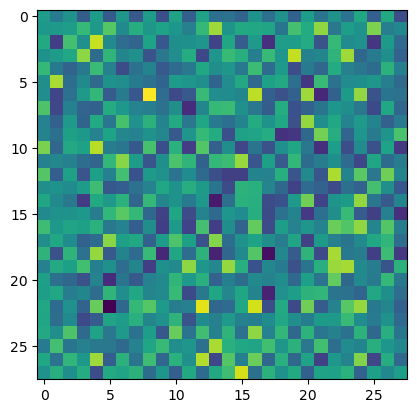

In [9]:
model = Generator(shape=(1, 28, 28), classes=10)
x = model(b)
# imshow x
import matplotlib.pyplot as plt
plt.imshow(x.detach().cpu().numpy()[0, 0])
print(x.shape)

model = Critic(shape=(1, 28, 28), classes=10)
print(model)
logit = model(b, x)
print(logit.shape)